<a href="https://colab.research.google.com/github/kursatkara/MAE_5020_Spring_2026/blob/master/in_class_example_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Image dimensions
height, width = 150, 200

# Create a black image (all zeros)
image = np.zeros((height, width), dtype=np.uint8)

# Rectangle dimensions
rect_h, rect_w = 30, 60

# Calculate center position
center_y, center_x = height // 2, width // 2

# Calculate rectangle coordinates
top = center_y - (rect_h // 2)
bottom = center_y + (rect_h // 2)
left = center_x - (rect_w // 2)
right = center_x + (rect_w // 2)

# Draw the white rectangle (255)
image[top:bottom, left:right] = 255

print(f"Image shape: {image.shape}")
print(f"Rectangle coordinates: y({top}:{bottom}), x({left}:{right})")

Image shape: (150, 200)
Rectangle coordinates: y(60:90), x(70:130)


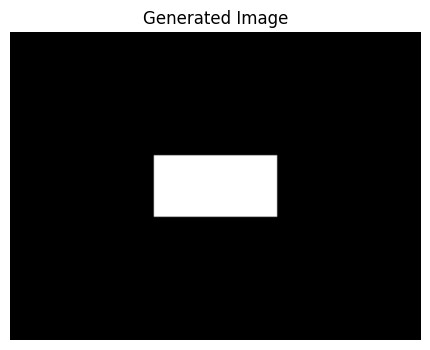

In [2]:
# Display the image
plt.figure(figsize=(6, 4))
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.title('Generated Image')
plt.axis('off')
plt.show()